Data Exploration process from the project proposal 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
db_b_5050 = pd.read_csv("datasets/diabetes_binary_5050.csv")


In [3]:
db_b_5050.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [4]:
mean_bmi_w_db = db_b_5050[db_b_5050['Diabetes_binary'] == 1]['BMI'].mean()
mean_bmi_wo_db = db_b_5050[db_b_5050['Diabetes_binary'] == 0]['BMI'].mean()

print("The mean BMI of people with diabetes is " + str(mean_bmi_w_db))
print("The mean BMI of people without diabetes is " + str(mean_bmi_wo_db))


The mean BMI of people with diabetes is 31.94401063769592
The mean BMI of people without diabetes is 27.769959825722854


Text(0, 0.5, 'Frequency')

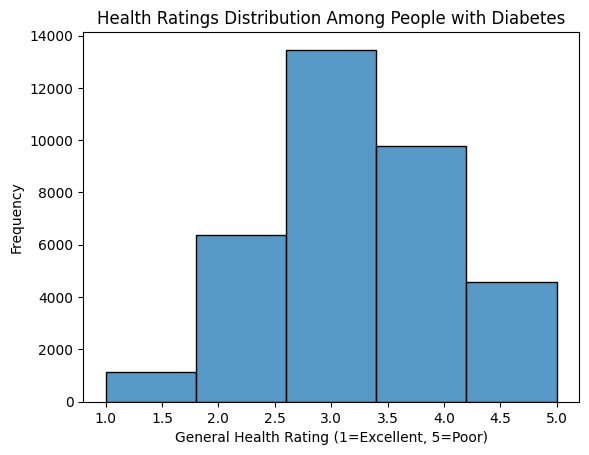

In [15]:


# Plotting histogram of health ratings for people with diabetes

sns.histplot(data=db_b_5050[db_b_5050['Diabetes_binary'] == 1], x='GenHlth', bins = 5)
plt.title('Health Ratings Distribution Among People with Diabetes')
plt.xlabel('General Health Rating (1=Excellent, 5=Poor)')
plt.ylabel('Frequency')


/var/folders/mz/57q3hbkj3gldm03rnq8cj4_c0000gn/T/ipykernel_40589/1059652071.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=smoking_counts.index, y=smoking_counts.values, palette=['gray', 'orange'])


([<matplotlib.axis.XTick at 0x3010e9b90>,
 [Text(0, 0, 'Non-Smoker'), Text(1, 0, 'Smoker')])

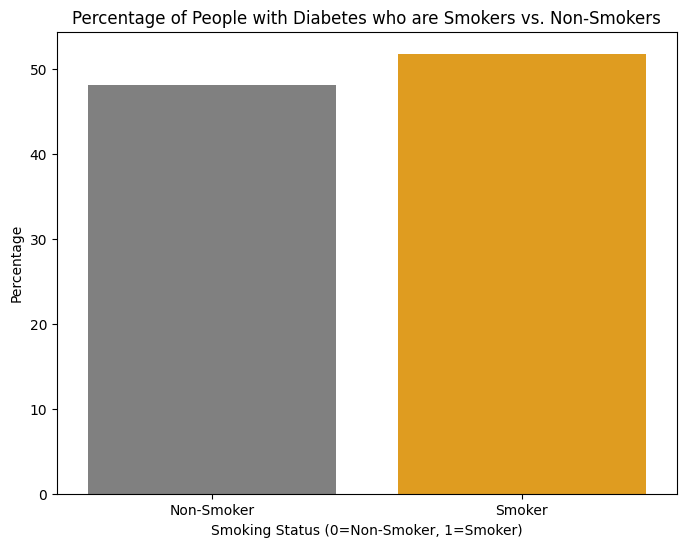

In [16]:
diabetes_data = db_b_5050[db_b_5050['Diabetes_binary'] == 1]
smoking_counts = diabetes_data['Smoker'].value_counts(normalize=True) * 100  # Convert counts to percentages

# Plotting bar graph for smokers vs. non-smokers among people with diabetes
plt.figure(figsize=(8, 6))
sns.barplot(x=smoking_counts.index, y=smoking_counts.values, palette=['gray', 'orange'])
plt.title('Percentage of People with Diabetes who are Smokers vs. Non-Smokers')
plt.xlabel('Smoking Status (0=Non-Smoker, 1=Smoker)')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])


Text(0, 0.5, 'Frequency')

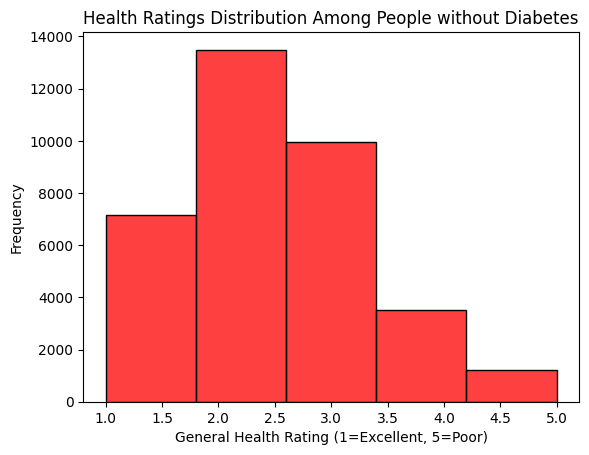

In [17]:
sns.histplot(data=db_b_5050[db_b_5050['Diabetes_binary'] == 0], x='GenHlth', bins = 5, color = 'red')
plt.title('Health Ratings Distribution Among People without Diabetes')
plt.xlabel('General Health Rating (1=Excellent, 5=Poor)')
plt.ylabel('Frequency')


/var/folders/mz/57q3hbkj3gldm03rnq8cj4_c0000gn/T/ipykernel_40589/2626394488.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diabetes_counts.index, y=diabetes_counts.values, palette=['blue', 'red'])


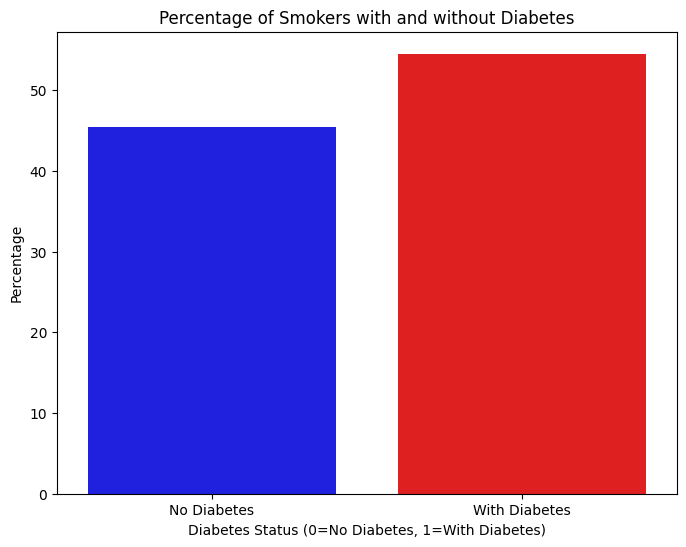

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of smokers with and without diabetes
smoker_data = db_b_5050[db_b_5050['Smoker'] == 1]
diabetes_counts = smoker_data['Diabetes_binary'].value_counts(normalize=True) * 100  # Convert counts to percentages

# Plotting bar chart for smokers with and without diabetes
plt.figure(figsize=(8, 6))
sns.barplot(x=diabetes_counts.index, y=diabetes_counts.values, palette=['blue', 'red'])
plt.title('Percentage of Smokers with and without Diabetes')
plt.xlabel('Diabetes Status (0=No Diabetes, 1=With Diabetes)')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['No Diabetes', 'With Diabetes'])
plt.show()


/var/folders/mz/57q3hbkj3gldm03rnq8cj4_c0000gn/T/ipykernel_40589/1753042214.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diabetes_smoking_percentage.index, y=diabetes_smoking_percentage.values, palette=['blue', 'green'])


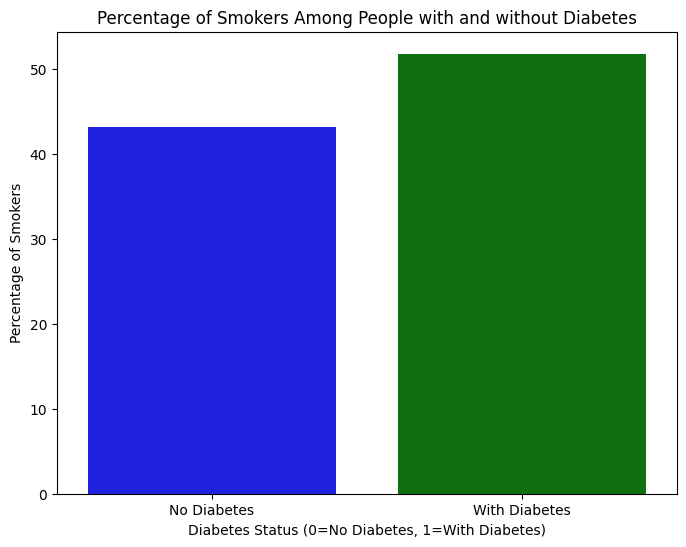

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentage of smokers among people with and without diabetes
diabetes_smoking_percentage = db_b_5050.groupby('Diabetes_binary')['Smoker'].mean() * 100

# Plotting bar chart for percentage of smokers with and without diabetes
plt.figure(figsize=(8, 6))
sns.barplot(x=diabetes_smoking_percentage.index, y=diabetes_smoking_percentage.values, palette=['blue', 'green'])
plt.title('Percentage of Smokers Among People with and without Diabetes')
plt.xlabel('Diabetes Status (0=No Diabetes, 1=With Diabetes)')
plt.ylabel('Percentage of Smokers')
plt.xticks([0, 1], ['No Diabetes', 'With Diabetes'])
plt.show()


/var/folders/mz/57q3hbkj3gldm03rnq8cj4_c0000gn/T/ipykernel_40589/4254298187.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=smoking_diabetes_percentage.index, y=smoking_diabetes_percentage.values, palette=['green', 'gray'])


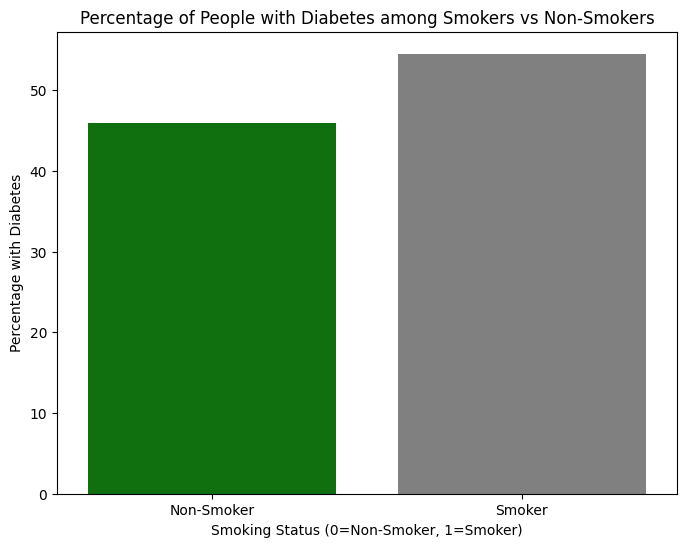

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of people with diabetes among smokers and non-smokers
smoking_diabetes_percentage = db_b_5050.groupby('Smoker')['Diabetes_binary'].mean() * 100

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=smoking_diabetes_percentage.index, y=smoking_diabetes_percentage.values, palette=['green', 'gray'])
plt.title('Percentage of People with Diabetes among Smokers vs Non-Smokers')
plt.xlabel('Smoking Status (0=Non-Smoker, 1=Smoker)')
plt.ylabel('Percentage with Diabetes')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.show()
